<a href="https://colab.research.google.com/github/farihane-redouan/CONVOLUTIONAL-NEURAL-NETWORK/blob/main/1_Deep_learning_by_simple_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Etape1 : Charger et exploiter la base de données MNIST**



In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

0


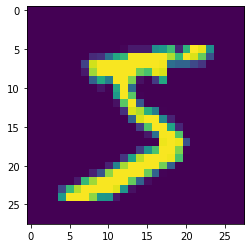

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(train_images[0])
print(train_images[40700,20,20])

**2. Prétraiter les données d'entrée pour Keras**

In [ ]:
X_train = train_images.reshape(train_images.shape[0], 28, 28,1)
X_test = test_images.reshape(test_images.shape[0], 28, 28,1)

In [ ]:
print (X_train.shape)

(60000, 28, 28, 1)


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**3. Etape3 : Prétraiter les étiquettes de classe pour Keras**

In [ ]:
print (train_labels.shape)

(60000,)


In [ ]:
print(train_labels[:10])

[5 0 4 1 9 2 1 3 1 4]


In [ ]:
# Convertir des tableaux de classes à une dimension en matrices de classes à 10 dimensions
from keras.utils import np_utils
Y_train = np_utils.to_categorical (train_labels, 10)
Y_test = np_utils.to_categorical (test_labels, 10)

In [ ]:
print (Y_train.shape)


(60000, 10)


**4. Etape4 : Définir l'architecture du modèle.**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Dropout ,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu',
input_shape=(28,28,1)))

In [ ]:
model.add(Conv2D(32, (3, 3),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

**5. Etape 5 : Compiler le modèle CNN (fonction de perte+Optimiseur)**

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']
)

**6. Etape 6 : Adapter le modèle aux données d'entraînement**

In [ ]:
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),batch_size=32,  epochs=200, verbose=1)

Epoch 1/200
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0132 - accuracy: 0.9969 - val_loss: 0.0517 - val_accuracy: 0.9935
Epoch 2/200
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0143 - accuracy: 0.9970 - val_loss: 0.0640 - val_accuracy: 0.9933
Epoch 3/200
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0118 - accuracy: 0.9977 - val_loss: 0.0681 - val_accuracy: 0.9925
Epoch 4/200
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0105 - accuracy: 0.9973 - val_loss: 0.0879 - val_accuracy: 0.9928
Epoch 5/200
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0135 - accuracy: 0.9969 - val_loss: 0.0672 - val_accuracy: 0.9937
Epoch 6/200
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0105 - accuracy: 0.9975 - val_loss: 0.0674 - val_accuracy: 0.9931
Epoch 7/200
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0136 - accuracy: 0.9970 - val_loss: 0.0659 - val_ac

**7. Etape7 : Évaluer le modèle sur les données de test**

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0538 - accuracy: 0.9931


In [ ]:
print(score)

[0.05380696430802345, 0.9930999875068665]


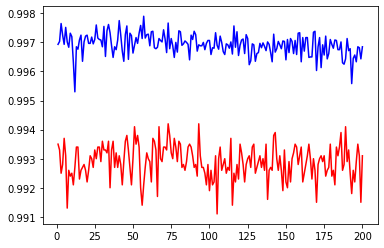

In [ ]:
plt.plot(range(1,201),history.history["accuracy"],c='blue')
plt.plot(range(1,201),history.history["val_accuracy"],c='red')
#plt.ylim(0.5,1)

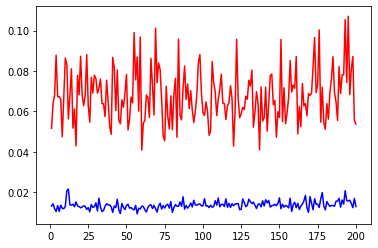

In [ ]:
plt.plot(range(1,201),history.history["loss"],c='blue')
plt.plot(range(1,201),history.history["val_loss"],c='red')